In [33]:
from rdkit import Chem
from rdkit.Chem import rdFMCS, Draw, rdDepictor
from rdkit.Chem.Draw import IPythonConsole
rdDepictor.SetPreferCoordGen(True)

In [34]:
# Load the molecules
ms = [x for x in Chem.ForwardSDMolSupplier('jnk1-2.sdf')]
ms2d = [Chem.Mol(x) for x in ms]
for m in ms2d:
    rdDepictor.Compute2DCoords(m)
IPythonConsole.drawOptions.addAtomIndices = False
# Draw.MolsToGridImage(ms2d)    # helpful for dividing groups

26


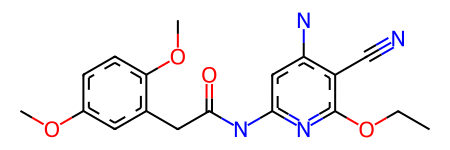

In [35]:
# Find and show the MCS.
ps = rdFMCS.MCSParameters() # instance of MCSParamerters class
res = rdFMCS.FindMCS(ms,ps)
qry = Chem.MolFromSmarts(res.smartsString)
print(qry.GetNumAtoms())
qry

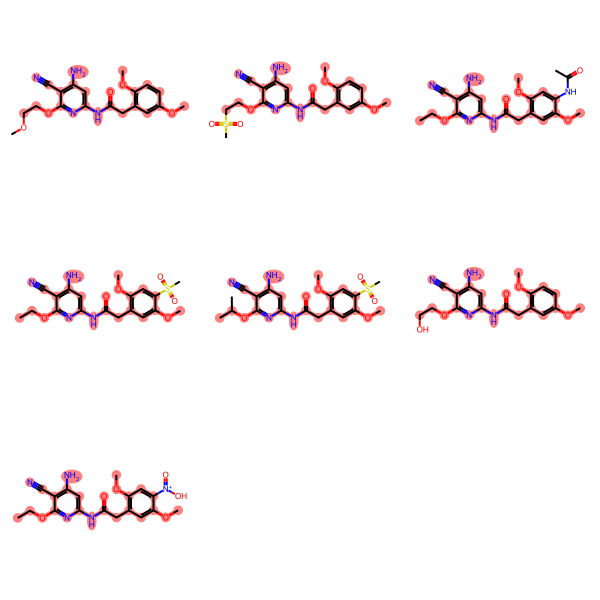

In [36]:
# Highlight the MCS in molecules.
matches = [x.GetSubstructMatch(qry) for x in ms2d]
conf = Chem.Conformer(qry.GetNumAtoms())
for i,mi in enumerate(matches[0]):
    conf.SetAtomPosition(i,ms2d[0].GetConformer().GetAtomPosition(mi))
qry.AddConformer(conf)

rdDepictor.SetPreferCoordGen(True)
for m in ms2d:
    rdDepictor.GenerateDepictionMatching2DStructure(m,qry)
Draw.MolsToGridImage(ms2d,highlightAtomLists=matches)

In [37]:
# Align the 3D molecules according to the MSC.
import mcs_align
mcs = mcs_align.MCSALIGN(ms)
mcs.align(4, True)  # number of reference_structure, is it strictly aligned
with Chem.SDWriter('jnk1-2_aligned.sdf') as w:
    for m in mcs.molecules_aligned:
        w.write(Chem.rdmolops.AddHs(m, addCoords=True))
# You could load `aligned.sdf` with PyMol.